In [46]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd
import os
import re

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [47]:
devices = tf.config.list_physical_devices('GPU')
print(len(devices)) 

1


In [48]:
tf.random.set_seed(6)

#### create dataframe with image labels

In [49]:
path = "photos/original"

files_list = [f for f in os.listdir(path) if os.path.isfile(f"{path}/{f}")]
print(files_list)
print(len(files_list))

['Alphabet_A_1.jpg', 'Alphabet_A_10.jpg', 'Alphabet_A_11.jpg', 'Alphabet_A_12.jpg', 'Alphabet_A_13.jpg', 'Alphabet_A_14.jpg', 'Alphabet_A_15.jpg', 'Alphabet_A_16.jpg', 'Alphabet_A_17.jpg', 'Alphabet_A_18.jpg', 'Alphabet_A_19.jpg', 'Alphabet_A_2.jpg', 'Alphabet_A_20.jpg', 'Alphabet_A_21.jpg', 'Alphabet_A_22.jpg', 'Alphabet_A_23.jpg', 'Alphabet_A_24.jpg', 'Alphabet_A_25.jpg', 'Alphabet_A_26.jpg', 'Alphabet_A_27.jpg', 'Alphabet_A_28.jpg', 'Alphabet_A_29.jpg', 'Alphabet_A_3.jpg', 'Alphabet_A_30.jpg', 'Alphabet_A_31.jpg', 'Alphabet_A_32.jpg', 'Alphabet_A_33.jpg', 'Alphabet_A_34.jpg', 'Alphabet_A_35.jpg', 'Alphabet_A_36.jpg', 'Alphabet_A_37.jpg', 'Alphabet_A_38.jpg', 'Alphabet_A_39.jpg', 'Alphabet_A_4.jpg', 'Alphabet_A_5.jpg', 'Alphabet_A_6.jpg', 'Alphabet_A_7.jpg', 'Alphabet_A_8.jpg', 'Alphabet_A_9.jpg', 'Alphabet_B_1.jpg', 'Alphabet_B_10.jpg', 'Alphabet_B_11.jpg', 'Alphabet_B_12.jpg', 'Alphabet_B_13.jpg', 'Alphabet_B_14.jpg', 'Alphabet_B_15.jpg', 'Alphabet_B_16.jpg', 'Alphabet_B_17.jpg', '

In [50]:
d = {"path": files_list}
img_df = pd.DataFrame(d)
img_df.head()

,path
0,Alphabet_A_1.jpg
1,Alphabet_A_10.jpg
2,Alphabet_A_11.jpg
3,Alphabet_A_12.jpg
4,Alphabet_A_13.jpg


In [51]:
classes = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", 
           "Alphabet_A", "Alphabet_B", "Alphabet_C", "Alphabet_D", "Alphabet_E", "Alphabet_F", "Alphabet_G", "Alphabet_H", "Alphabet_S", "Alphabet_T", "Alphabet_U", "Alphabet_v", "Alphabet_w", "Alphabet_x", "Alphabet_y", "Alphabet_z", 
           "up_arrow", "down_arrow", "right_arrow", "left_arrow", "Stop", "Bullseye"]

In [52]:
img_df["class"] = img_df["path"].apply(lambda x: x.rsplit('_', 1)[0])
print(img_df["class"].unique())
print(len(img_df["class"].unique()))

['Alphabet_A' 'Alphabet_B' 'Alphabet_C' 'Alphabet_D' 'Alphabet_E'
 'Alphabet_F' 'Alphabet_G' 'Alphabet_H' 'Alphabet_S' 'Alphabet_T'
 'Alphabet_U' 'Alphabet_v' 'Alphabet_w' 'Alphabet_x' 'Alphabet_y'
 'Alphabet_z' 'Bullseye' 'down_arrow' 'eight' 'five' 'four' 'left_arrow'
 'nine' 'one' 'right_arrow' 'seven' 'six' 'Stop' 'three' 'two' 'up_arrow']
31


In [53]:
img_df["label"] = img_df["class"].apply(lambda x: classes.index(x))
img_df.head()

,path,class,label
0,Alphabet_A_1.jpg,Alphabet_A,9
1,Alphabet_A_10.jpg,Alphabet_A,9
2,Alphabet_A_11.jpg,Alphabet_A,9
3,Alphabet_A_12.jpg,Alphabet_A,9
4,Alphabet_A_13.jpg,Alphabet_A,9


In [54]:
img_df["image_id"] = img_df["label"].apply(lambda x: x+11)
img_df.head()

,path,class,label,image_id
0,Alphabet_A_1.jpg,Alphabet_A,9,20
1,Alphabet_A_10.jpg,Alphabet_A,9,20
2,Alphabet_A_11.jpg,Alphabet_A,9,20
3,Alphabet_A_12.jpg,Alphabet_A,9,20
4,Alphabet_A_13.jpg,Alphabet_A,9,20


In [55]:
img_df.to_csv("photos/image_labels.csv", index=False)

In [56]:
len(img_df)

1211

### Resize images

In [57]:
from PIL import Image

(new_width, new_height) = (128, 128)

path = "photos/original/"
filenames = img_df["path"]

for filename in filenames:
    with Image.open(f"{path}/{filename}") as im:
        width, height = im.size
        if height >= width:
            left = 0
            top = (height-width)/2
            right = width
            bottom = width+(height-width)/2
        else:
            left = (width-height)/2
            top = 0
            right = height+(width-height)/2
            bottom = height
        im_cropped = im.crop((left, top, right, bottom))
        im_resized = im_cropped.resize((new_width, new_height), resample=Image.HAMMING)
        im_resized.save(f"photos/resized/128/{filename}")

### Create dataset

In [58]:
img_df = pd.read_csv("photos/image_labels.csv")
print(len(img_df))
img_df.head()

1211


,path,class,label,image_id
0,Alphabet_A_1.jpg,Alphabet_A,9,20
1,Alphabet_A_10.jpg,Alphabet_A,9,20
2,Alphabet_A_11.jpg,Alphabet_A,9,20
3,Alphabet_A_12.jpg,Alphabet_A,9,20
4,Alphabet_A_13.jpg,Alphabet_A,9,20


In [59]:
filenames = img_df["path"]
labels = img_df["label"]
classes = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", 
           "Alphabet_A", "Alphabet_B", "Alphabet_C", "Alphabet_D", "Alphabet_E", "Alphabet_F", "Alphabet_G", "Alphabet_H", "Alphabet_S", "Alphabet_T", "Alphabet_U", "Alphabet_v", "Alphabet_w", "Alphabet_x", "Alphabet_y", "Alphabet_z", 
           "up_arrow", "down_arrow", "right_arrow", "left_arrow", "Stop", "Bullseye"]

In [60]:
def decode_images(file):
  path = f"./photos/resized/128/{file}"
  print(path)
  image_decoded = tf.image.decode_jpeg(tf.io.read_file(path), channels=3)/255
  im = tf.cast(image_decoded, tf.float32)
  return im

decoded_images = list(map(lambda file: decode_images(file), list(filenames)))

./photos/resized/128/Alphabet_A_1.jpg
./photos/resized/128/Alphabet_A_10.jpg
./photos/resized/128/Alphabet_A_11.jpg
./photos/resized/128/Alphabet_A_12.jpg
./photos/resized/128/Alphabet_A_13.jpg
./photos/resized/128/Alphabet_A_14.jpg
./photos/resized/128/Alphabet_A_15.jpg
./photos/resized/128/Alphabet_A_16.jpg
./photos/resized/128/Alphabet_A_17.jpg
./photos/resized/128/Alphabet_A_18.jpg
./photos/resized/128/Alphabet_A_19.jpg
./photos/resized/128/Alphabet_A_2.jpg
./photos/resized/128/Alphabet_A_20.jpg
./photos/resized/128/Alphabet_A_21.jpg
./photos/resized/128/Alphabet_A_22.jpg
./photos/resized/128/Alphabet_A_23.jpg
./photos/resized/128/Alphabet_A_24.jpg
./photos/resized/128/Alphabet_A_25.jpg
./photos/resized/128/Alphabet_A_26.jpg
./photos/resized/128/Alphabet_A_27.jpg
./photos/resized/128/Alphabet_A_28.jpg
./photos/resized/128/Alphabet_A_29.jpg
./photos/resized/128/Alphabet_A_3.jpg
./photos/resized/128/Alphabet_A_30.jpg
./photos/resized/128/Alphabet_A_31.jpg
./photos/resized/128/Alphabe

In [61]:
print(decoded_images[1])

tf.Tensor(
[[[0.7411765  0.6784314  0.6156863 ]
  [0.74509805 0.68235296 0.61960787]
  [0.7411765  0.6901961  0.62352943]
  ...
  [0.36078432 0.4        0.40392157]
  [0.35686275 0.39607844 0.4       ]
  [0.3529412  0.39215687 0.39607844]]

 [[0.7254902  0.6627451  0.6       ]
  [0.73333335 0.67058825 0.60784316]
  [0.7294118  0.6784314  0.6117647 ]
  ...
  [0.33333334 0.37254903 0.3764706 ]
  [0.32941177 0.36862746 0.37254903]
  [0.3254902  0.3647059  0.36862746]]

 [[0.7137255  0.6509804  0.5882353 ]
  [0.72156864 0.65882355 0.59607846]
  [0.72156864 0.67058825 0.6039216 ]
  ...
  [0.29411766 0.33333334 0.32941177]
  [0.2901961  0.32941177 0.3254902 ]
  [0.28627452 0.3254902  0.32156864]]

 ...

 [[0.32156864 0.3372549  0.33333334]
  [0.32156864 0.3372549  0.33333334]
  [0.32156864 0.3372549  0.33333334]
  ...
  [0.7372549  0.78039217 0.7254902 ]
  [0.7372549  0.78039217 0.7254902 ]
  [0.7372549  0.78039217 0.7254902 ]]

 [[0.32156864 0.3372549  0.33333334]
  [0.32156864 0.3372549  0

In [62]:
labels = tf.constant(labels)

In [63]:
print(labels)

tf.Tensor([ 9  9  9 ... 25 25 25], shape=(1211,), dtype=int64)


In [64]:
dataset = tf.data.Dataset.from_tensor_slices((decoded_images, labels))

In [65]:
len(dataset)

1211

In [66]:
dataset = dataset.shuffle(1211)

In [67]:
dataset

<ShuffleDataset element_spec=(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

Text(0.5, 1.0, 'right_arrow')

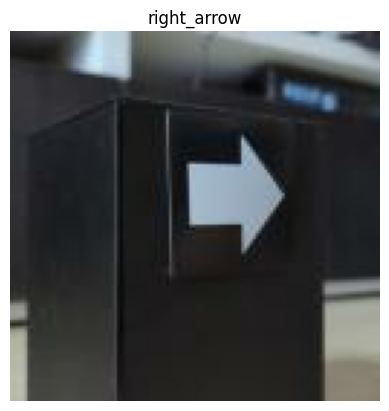

In [68]:
image, label = next(iter(dataset))
plt.imshow(image)
plt.axis("off")
plt.title(classes[label])

In [69]:
path = "./datasets/original_128"

dataset.save(path)

### Data augmentation

In [70]:
path = "./datasets/original_128"

dataset = tf.data.Dataset.load(path)


In [71]:
len(dataset)

1211

In [72]:
classes = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", 
           "Alphabet_A", "Alphabet_B", "Alphabet_C", "Alphabet_D", "Alphabet_E", "Alphabet_F", "Alphabet_G", "Alphabet_H", "Alphabet_S", "Alphabet_T", "Alphabet_U", "Alphabet_v", "Alphabet_w", "Alphabet_x", "Alphabet_y", "Alphabet_z", 
           "up_arrow", "down_arrow", "right_arrow", "left_arrow", "Stop", "Bullseye"]

In [73]:
data_augmentation = keras.Sequential(
  [
    layers.RandomZoom(0.25, fill_mode="nearest"),
    layers.RandomRotation(0.006, fill_mode="nearest"),
    layers.RandomBrightness(0.00045),
    layers.RandomContrast(0.00045)
  ]
)

Text(0.5, 1.0, 'six')

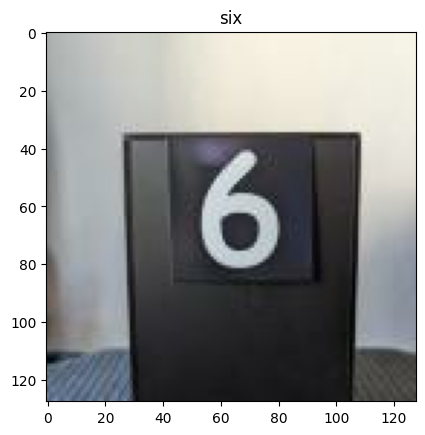

In [74]:
image, label = next(iter(dataset))
plt.imshow(image)
plt.title(classes[label])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


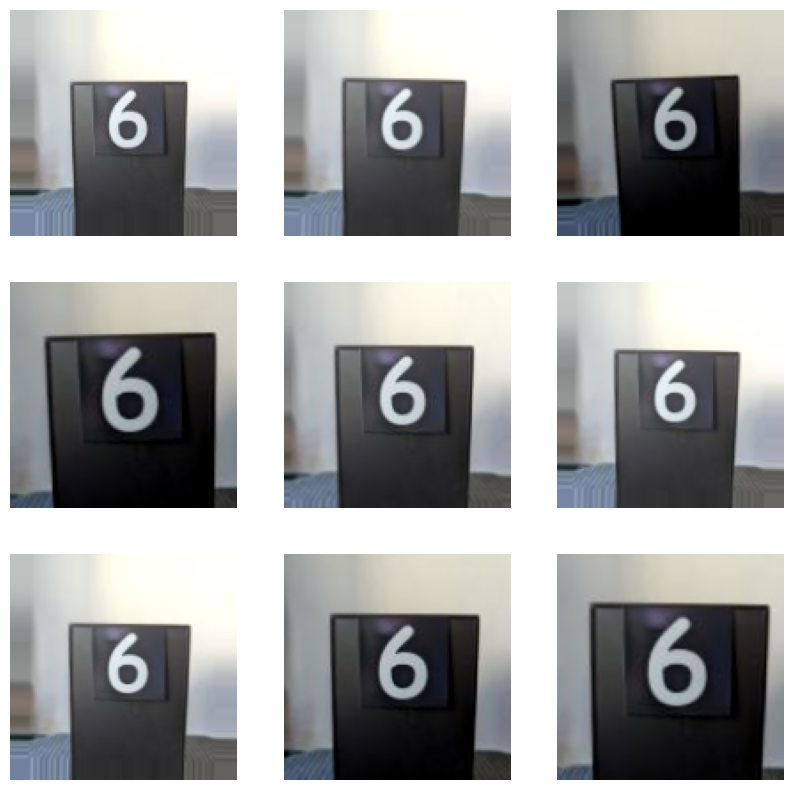

In [75]:
plt.figure(figsize=(10, 10))
for i in range(9):
  new_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(new_image)
  plt.axis("off")

### Train-test-val split

In [76]:
path = "./datasets/original_128"

full_dataset = tf.data.Dataset.load(path)


In [77]:
classes = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", 
           "Alphabet_A", "Alphabet_B", "Alphabet_C", "Alphabet_D", "Alphabet_E", "Alphabet_F", "Alphabet_G", "Alphabet_H", "Alphabet_S", "Alphabet_T", "Alphabet_U", "Alphabet_v", "Alphabet_w", "Alphabet_x", "Alphabet_y", "Alphabet_z", 
           "up_arrow", "down_arrow", "right_arrow", "left_arrow", "Stop", "Bullseye"]

In [78]:
len(full_dataset)

1211

In [79]:
val_size = test_size = int(0.15*len(full_dataset))
train_size = len(full_dataset) - val_size - test_size

train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)

print(len(train_dataset), len(val_dataset), len(test_dataset))

849 181 181


In [80]:
#check if all datasets contain all classes
train_labels = []
for image, label in train_dataset:
    train_labels.append(int(label))

print(len(np.unique(train_labels)))

val_labels = []
for image, label in val_dataset:
    val_labels.append(int(label))

print(len(np.unique(val_labels)))

test_labels = []
for image, label in test_dataset:
    test_labels.append(int(label))

print(len(np.unique(test_labels)))

31
31
31


In [81]:
batch_size = 64

train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [82]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

### CNN

In [83]:
img_shape = (128, 128, 3,)

In [84]:
data_augmentation = keras.Sequential(
  [
    keras.Input(shape=img_shape),
    layers.RandomZoom(0.25, fill_mode="nearest"),
    layers.RandomRotation(0.006, fill_mode="nearest"),
    layers.RandomBrightness(0.00045),
    layers.RandomContrast(0.00045)
  ]
)

Text(0.5, 1.0, 'six')

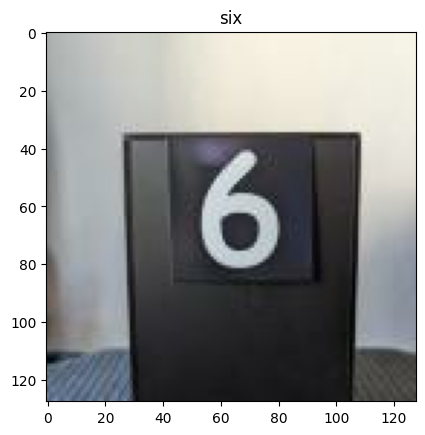

In [85]:
images, labels = next(iter(train_dataset))
plt.imshow(images[0])
plt.title(classes[labels[0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


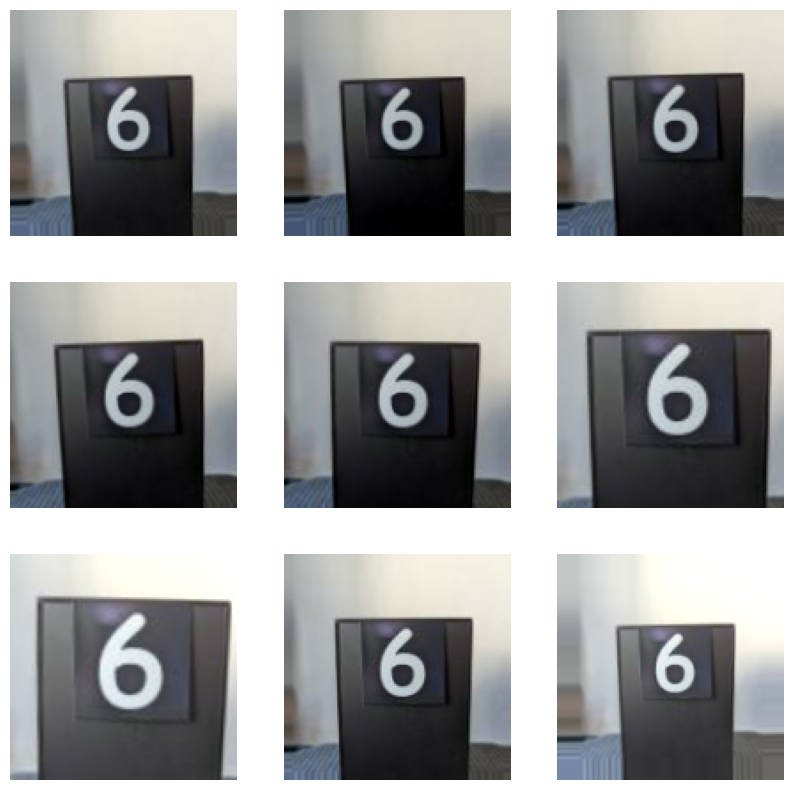

In [86]:
plt.figure(figsize=(10, 10))

for i in range(9):
  new_images = data_augmentation(images)
  new_image = new_images[0]
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(new_image)
  plt.axis("off")

In [149]:
cnn_model = Sequential([
  keras.Input(shape=img_shape),
  data_augmentation,
  layers.Conv2D(32, 3, activation='relu'),
  keras.layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(32, 3, activation='relu'),
  keras.layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(64, 3, activation='relu'),
  keras.layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling2D(),
  layers.Dense(len(classes))
])


In [150]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [151]:
checkpoint_filepath = 'models/testing/cnn_model.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='max',
    save_best_only=True)


In [152]:
cnn_model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [153]:
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_15 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 batch_normalization_16 (Bat  (None, 61, 61, 32)      

In [154]:
epochs = 100

history = cnn_model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs, 
  callbacks=[model_checkpoint_callback]
)

Epoch 1/100


14/14 [==============================] - 18s 1s/step - loss: 3.4265 - accuracy: 0.0601 - val_loss: 3.4386 - val_accuracy: 0.0166
Epoch 2/100
14/14 [==============================] - 15s 1s/step - loss: 3.1238 - accuracy: 0.1307 - val_loss: 3.4313 - val_accuracy: 0.0497
Epoch 3/100
14/14 [==============================] - 14s 1s/step - loss: 2.9594 - accuracy: 0.1578 - val_loss: 3.4256 - val_accuracy: 0.0497
Epoch 4/100
14/14 [==============================] - 14s 1s/step - loss: 2.8212 - accuracy: 0.1885 - val_loss: 3.4156 - val_accuracy: 0.0497
Epoch 5/100
14/14 [==============================] - 15s 1s/step - loss: 2.7187 - accuracy: 0.2191 - val_loss: 3.4111 - val_accuracy: 0.0497
Epoch 6/100
14/14 [==============================] - 15s 1s/step - loss: 2.6281 - accuracy: 0.2744 - val_loss: 3.4084 - val_accuracy: 0.0829
Epoch 7/100
14/14 [==============================] - 14s 979ms/step - loss: 2.5294 - accuracy: 0.2909 - val_loss: 3.4063 - val_accuracy: 0.0442
Epoch 8/100
14/14 [===

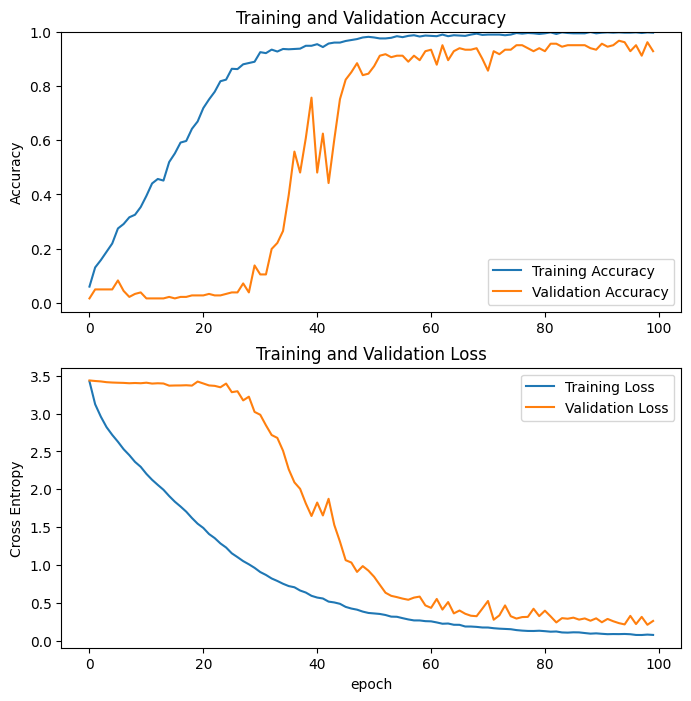

In [155]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [156]:
#decrease learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)

In [157]:
cnn_model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [158]:
#train for another 25 epochs
epochs = 25

history1 = cnn_model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs, 
  callbacks=[model_checkpoint_callback]
)

Epoch 1/25


14/14 [==============================] - 19s 1s/step - loss: 0.0763 - accuracy: 0.9941 - val_loss: 0.2253 - val_accuracy: 0.9392
Epoch 2/25
14/14 [==============================] - 14s 1s/step - loss: 0.0658 - accuracy: 0.9976 - val_loss: 0.2322 - val_accuracy: 0.9448
Epoch 3/25
14/14 [==============================] - 14s 977ms/step - loss: 0.0630 - accuracy: 1.0000 - val_loss: 0.2381 - val_accuracy: 0.9448
Epoch 4/25
14/14 [==============================] - 14s 981ms/step - loss: 0.0634 - accuracy: 0.9988 - val_loss: 0.2279 - val_accuracy: 0.9448
Epoch 5/25
14/14 [==============================] - 14s 972ms/step - loss: 0.0633 - accuracy: 1.0000 - val_loss: 0.2165 - val_accuracy: 0.9448
Epoch 6/25
14/14 [==============================] - 14s 976ms/step - loss: 0.0644 - accuracy: 0.9976 - val_loss: 0.2062 - val_accuracy: 0.9503
Epoch 7/25
14/14 [==============================] - 14s 992ms/step - loss: 0.0602 - accuracy: 1.0000 - val_loss: 0.2095 - val_accuracy: 0.9448
Epoch 8/25
14/14

In [159]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

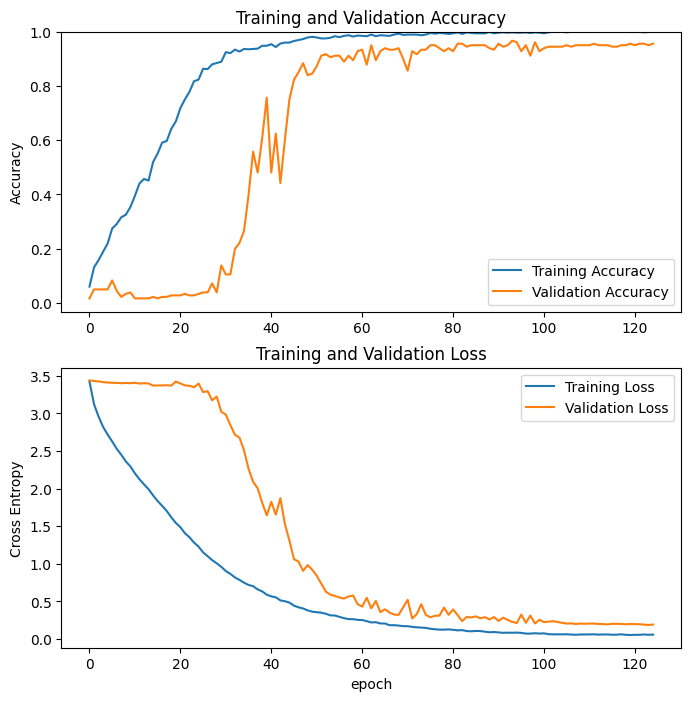

In [160]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [161]:
#decrease learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.00005, momentum=0.9)

In [162]:
cnn_model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [163]:
#train for another 25 epochs
epochs = 25

history2 = cnn_model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs, 
  callbacks=[model_checkpoint_callback]
)

Epoch 1/25


14/14 [==============================] - 18s 1s/step - loss: 0.0541 - accuracy: 0.9988 - val_loss: 0.1969 - val_accuracy: 0.9503
Epoch 2/25
14/14 [==============================] - 15s 1s/step - loss: 0.0547 - accuracy: 1.0000 - val_loss: 0.1987 - val_accuracy: 0.9503
Epoch 3/25
14/14 [==============================] - 15s 1s/step - loss: 0.0592 - accuracy: 0.9988 - val_loss: 0.1967 - val_accuracy: 0.9503
Epoch 4/25
14/14 [==============================] - 14s 1s/step - loss: 0.0596 - accuracy: 0.9988 - val_loss: 0.1968 - val_accuracy: 0.9503
Epoch 5/25
14/14 [==============================] - 14s 1s/step - loss: 0.0614 - accuracy: 1.0000 - val_loss: 0.2011 - val_accuracy: 0.9503
Epoch 6/25
14/14 [==============================] - 14s 1s/step - loss: 0.0592 - accuracy: 0.9976 - val_loss: 0.1947 - val_accuracy: 0.9503
Epoch 7/25
14/14 [==============================] - 14s 1s/step - loss: 0.0572 - accuracy: 1.0000 - val_loss: 0.1951 - val_accuracy: 0.9503
Epoch 8/25
14/14 [=============

In [164]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history, history2.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

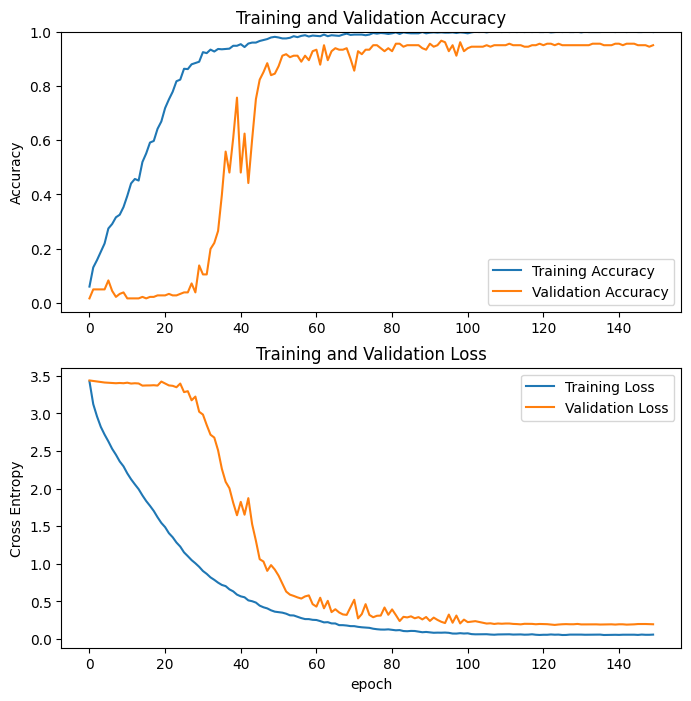

In [165]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [166]:
#decrease learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9)

In [167]:
cnn_model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [168]:
#train for another 50 epochs
epochs = 50

history3 = cnn_model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs, 
  callbacks=[model_checkpoint_callback]
)

Epoch 1/50


14/14 [==============================] - 19s 1s/step - loss: 0.0555 - accuracy: 0.9988 - val_loss: 0.1959 - val_accuracy: 0.9503
Epoch 2/50
14/14 [==============================] - 15s 1s/step - loss: 0.0572 - accuracy: 1.0000 - val_loss: 0.1951 - val_accuracy: 0.9503
Epoch 3/50
14/14 [==============================] - 15s 1s/step - loss: 0.0580 - accuracy: 0.9976 - val_loss: 0.1954 - val_accuracy: 0.9448
Epoch 4/50
14/14 [==============================] - 15s 1s/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 0.1958 - val_accuracy: 0.9448
Epoch 5/50
14/14 [==============================] - 15s 1s/step - loss: 0.0582 - accuracy: 1.0000 - val_loss: 0.1956 - val_accuracy: 0.9448
Epoch 6/50
14/14 [==============================] - 15s 1s/step - loss: 0.0556 - accuracy: 1.0000 - val_loss: 0.1955 - val_accuracy: 0.9448
Epoch 7/50
14/14 [==============================] - 15s 1s/step - loss: 0.0582 - accuracy: 1.0000 - val_loss: 0.1957 - val_accuracy: 0.9448
Epoch 8/50
14/14 [=============

In [169]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history, history2.history, history3.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

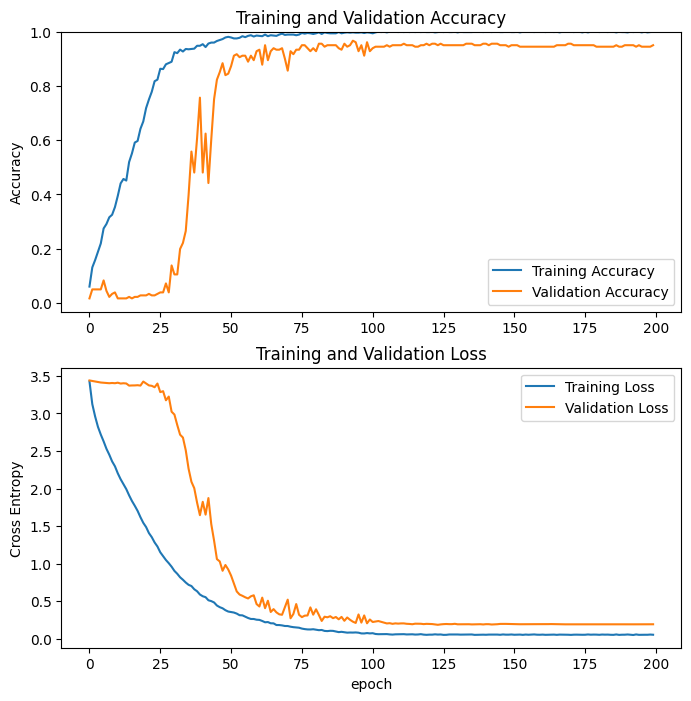

In [170]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [171]:
results = cnn_model.evaluate(test_dataset, batch_size=64)
print("test loss, test acc:", results)

3/3 [==============================] - 0s 31ms/step - loss: 0.1443 - accuracy: 0.9669
test loss, test acc: [0.1443232148885727, 0.9668508172035217]


In [172]:
from sklearn.metrics import confusion_matrix

test_labels = []
pred_labels = []
for images, labels in test_dataset:
    test_labels += list(labels.numpy())
    pred_logits = cnn_model.predict(images)
    pred_labels += list(tf.math.argmax(pred_logits, axis=1))

cm = confusion_matrix(test_labels, pred_labels)

2/2 [==============================] - 0s 49ms/step


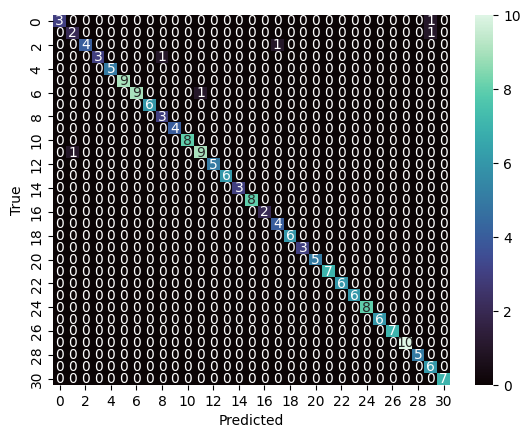

In [173]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

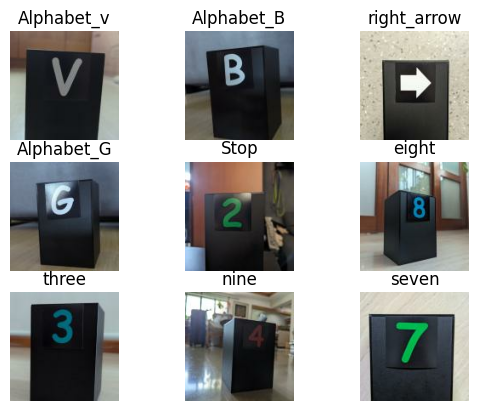

In [174]:
images, labels = next(iter(test_dataset))
preds = cnn_model(images)
preds = tf.math.argmax(preds, 1).numpy()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(preds[i])])
    plt.axis("off")

In [59]:
#cnn_model.save("./models/testing/cnn_model.keras")

#### depthwise convolution

In [175]:
img_shape = (128, 128, 3,)

In [183]:
cnn_model_dw = Sequential([
  keras.Input(shape=img_shape),
  data_augmentation,
  layers.SeparableConv2D(32, 3, 1, depth_multiplier=1, activation='relu'),
  keras.layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.SeparableConv2D(32, 3, 1, depth_multiplier=1, activation='relu'),
  keras.layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.SeparableConv2D(64, 3, 1, depth_multiplier=1, activation='relu'),
  keras.layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling2D(),
  layers.Dense(len(classes))
])


In [184]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [185]:
cnn_model_dw.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [186]:
cnn_model_dw.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 separable_conv2d_3 (Separab  (None, 126, 126, 32)     155       
 leConv2D)                                                       
                                                                 
 batch_normalization_21 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 separable_conv2d_4 (Separab  (None, 61, 61, 32)       1344      
 leConv2D)                                           

In [187]:
checkpoint_filepath = 'models/testing/cnn_model_dw.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='max',
    save_best_only=True)


In [188]:
epochs = 100

history = cnn_model_dw.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/100


14/14 [==============================] - 20s 1s/step - loss: 3.4996 - accuracy: 0.0342 - val_loss: 3.4361 - val_accuracy: 0.0221
Epoch 2/100
14/14 [==============================] - 16s 1s/step - loss: 3.3540 - accuracy: 0.0718 - val_loss: 3.4381 - val_accuracy: 0.0221
Epoch 3/100
14/14 [==============================] - 16s 1s/step - loss: 3.2773 - accuracy: 0.0824 - val_loss: 3.4396 - val_accuracy: 0.0166
Epoch 4/100
14/14 [==============================] - 16s 1s/step - loss: 3.2095 - accuracy: 0.1084 - val_loss: 3.4411 - val_accuracy: 0.0166
Epoch 5/100
14/14 [==============================] - 16s 1s/step - loss: 3.1156 - accuracy: 0.1343 - val_loss: 3.4427 - val_accuracy: 0.0166
Epoch 6/100
14/14 [==============================] - 14s 960ms/step - loss: 3.0503 - accuracy: 0.1413 - val_loss: 3.4449 - val_accuracy: 0.0166
Epoch 7/100
14/14 [==============================] - 14s 987ms/step - loss: 2.9824 - accuracy: 0.1637 - val_loss: 3.4479 - val_accuracy: 0.0166
Epoch 8/100
14/14 [

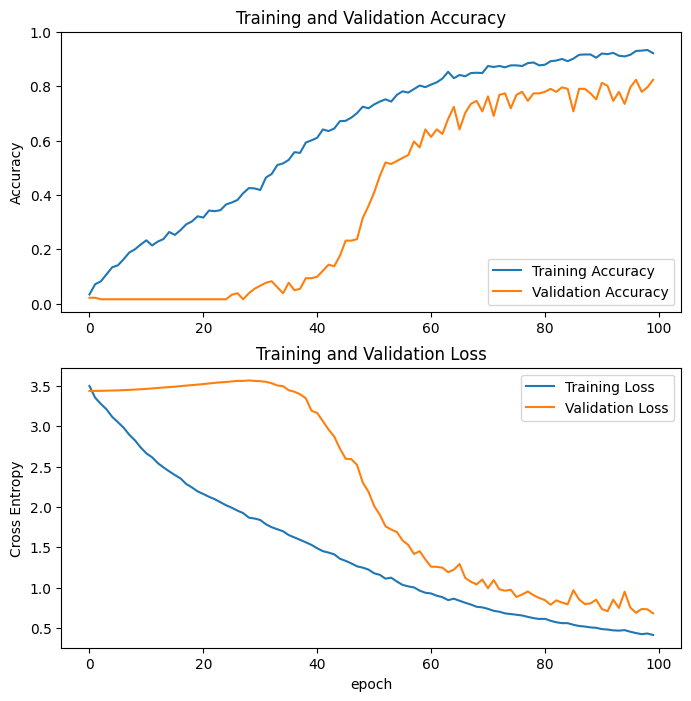

In [189]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [190]:
#decrease learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

cnn_model_dw.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [191]:
#train for another 200 epochs
epochs = 50

history1 = cnn_model_dw.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/50


14/14 [==============================] - 18s 1s/step - loss: 0.3991 - accuracy: 0.9305 - val_loss: 0.6571 - val_accuracy: 0.8122
Epoch 2/50
14/14 [==============================] - 13s 964ms/step - loss: 0.3934 - accuracy: 0.9435 - val_loss: 0.6639 - val_accuracy: 0.8066
Epoch 3/50
14/14 [==============================] - 13s 909ms/step - loss: 0.3999 - accuracy: 0.9458 - val_loss: 0.6455 - val_accuracy: 0.8177
Epoch 4/50
14/14 [==============================] - 13s 908ms/step - loss: 0.3823 - accuracy: 0.9446 - val_loss: 0.6417 - val_accuracy: 0.8122
Epoch 5/50
14/14 [==============================] - 13s 894ms/step - loss: 0.3939 - accuracy: 0.9376 - val_loss: 0.6437 - val_accuracy: 0.8122
Epoch 6/50
14/14 [==============================] - 13s 896ms/step - loss: 0.3910 - accuracy: 0.9305 - val_loss: 0.6424 - val_accuracy: 0.8287
Epoch 7/50
14/14 [==============================] - 13s 901ms/step - loss: 0.3814 - accuracy: 0.9470 - val_loss: 0.6273 - val_accuracy: 0.8287
Epoch 8/50
14

In [192]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

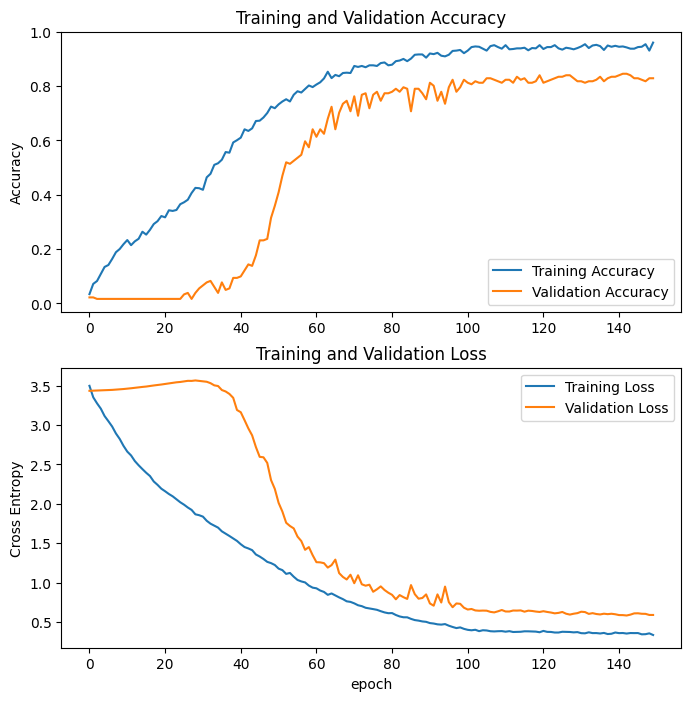

In [193]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [194]:
optimizer = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)

In [195]:
cnn_model_dw.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [196]:
#train for another 100 epochs
epochs = 100

history2 = cnn_model_dw.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/100


14/14 [==============================] - 16s 914ms/step - loss: 0.3555 - accuracy: 0.9364 - val_loss: 0.5906 - val_accuracy: 0.8177
Epoch 2/100
14/14 [==============================] - 13s 902ms/step - loss: 0.3577 - accuracy: 0.9482 - val_loss: 0.6075 - val_accuracy: 0.8232
Epoch 3/100
14/14 [==============================] - 13s 908ms/step - loss: 0.3466 - accuracy: 0.9529 - val_loss: 0.6289 - val_accuracy: 0.8066
Epoch 4/100
14/14 [==============================] - 13s 944ms/step - loss: 0.3437 - accuracy: 0.9399 - val_loss: 0.6323 - val_accuracy: 0.8177
Epoch 5/100
14/14 [==============================] - 13s 918ms/step - loss: 0.3514 - accuracy: 0.9482 - val_loss: 0.6057 - val_accuracy: 0.8398
Epoch 6/100
14/14 [==============================] - 13s 905ms/step - loss: 0.3480 - accuracy: 0.9376 - val_loss: 0.6126 - val_accuracy: 0.8122
Epoch 7/100
14/14 [==============================] - 13s 899ms/step - loss: 0.3384 - accuracy: 0.9470 - val_loss: 0.6797 - val_accuracy: 0.7901
Epoc

In [197]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history, history2.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

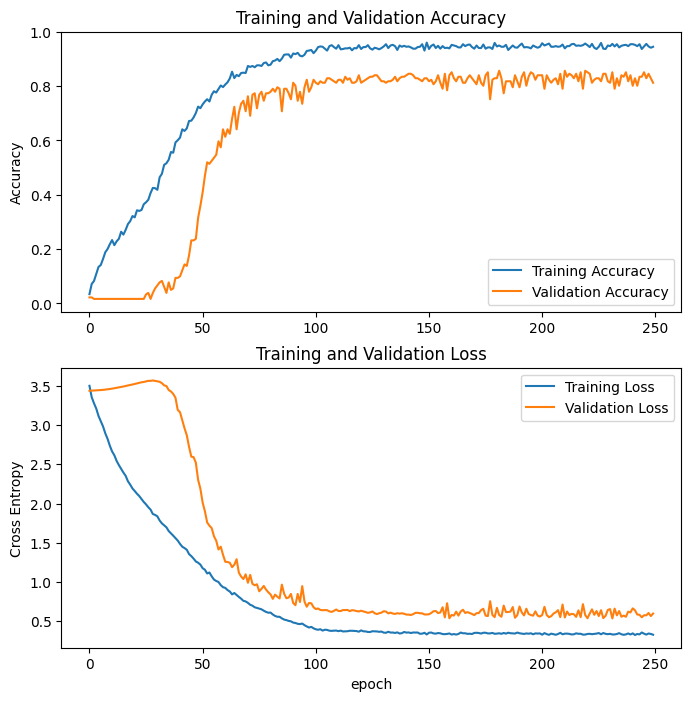

In [198]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [199]:
#decrease learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9)

cnn_model_dw.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [200]:
#train for another 100 epochs
epochs = 100

history3 = cnn_model_dw.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/100


14/14 [==============================] - 16s 916ms/step - loss: 0.3285 - accuracy: 0.9482 - val_loss: 0.5819 - val_accuracy: 0.8177
Epoch 2/100
14/14 [==============================] - 12s 875ms/step - loss: 0.3296 - accuracy: 0.9470 - val_loss: 0.5602 - val_accuracy: 0.8177
Epoch 3/100
14/14 [==============================] - 13s 896ms/step - loss: 0.3306 - accuracy: 0.9505 - val_loss: 0.5566 - val_accuracy: 0.8453
Epoch 4/100
14/14 [==============================] - 12s 880ms/step - loss: 0.3226 - accuracy: 0.9564 - val_loss: 0.5480 - val_accuracy: 0.8287
Epoch 5/100
14/14 [==============================] - 12s 879ms/step - loss: 0.3350 - accuracy: 0.9494 - val_loss: 0.5560 - val_accuracy: 0.8232
Epoch 6/100
14/14 [==============================] - 12s 888ms/step - loss: 0.3318 - accuracy: 0.9470 - val_loss: 0.5604 - val_accuracy: 0.8232
Epoch 7/100
14/14 [==============================] - 12s 874ms/step - loss: 0.3406 - accuracy: 0.9470 - val_loss: 0.5567 - val_accuracy: 0.8343
Epoc

In [201]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history, history2.history, history3.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

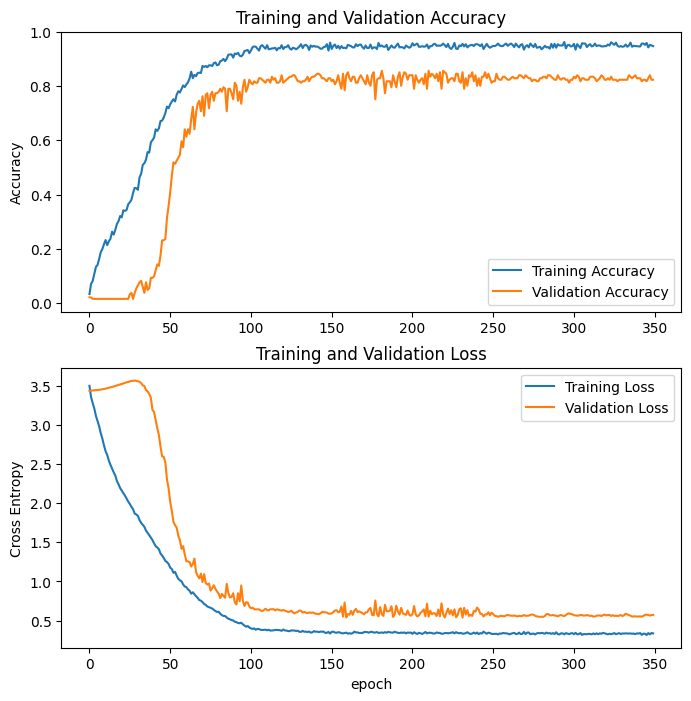

In [202]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [203]:
results = cnn_model_dw.evaluate(test_dataset, batch_size=64)
print("test loss, test acc:", results)

3/3 [==============================] - 0s 23ms/step - loss: 0.4196 - accuracy: 0.9171
test loss, test acc: [0.41958189010620117, 0.9171270728111267]


In [204]:
from sklearn.metrics import confusion_matrix

test_labels = []
pred_labels = []
for images, labels in test_dataset:
    test_labels += list(labels.numpy())
    pred_logits = cnn_model_dw.predict(images)
    pred_labels += list(tf.math.argmax(pred_logits, axis=1))

cm = confusion_matrix(test_labels, pred_labels)

2/2 [==============================] - 0s 4ms/step


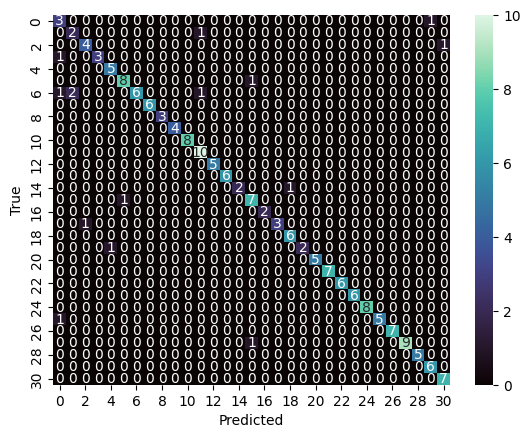

In [205]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

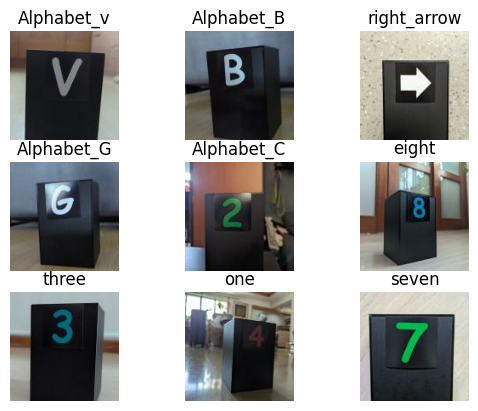

In [206]:
images, labels = next(iter(test_dataset))
preds = cnn_model_dw(images)
preds = tf.math.argmax(preds, 1).numpy()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(preds[i])])
    plt.axis("off")

In [41]:
#cnn_model_dw.save("./models/testing/cnn_model_dw.keras")

### Finetune pretrained model

In [207]:
img_shape = (128, 128, 3)

In [208]:
mobnetv3 = keras.applications.MobileNetV3Small(
  input_shape=img_shape,
  classes=len(classes),
  include_top=False,
  weights='imagenet',
  pooling=None,
  include_preprocessing=True
)

In [210]:
mobnetv3.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 128, 128, 3)  0           ['input_10[0][0]']               
                                                                                                  
 Conv (Conv2D)                  (None, 64, 64, 16)   432         ['rescaling[0][0]']              
                                                                                                  
 Conv/BatchNorm (BatchNormaliza  (None, 64, 64, 16)  64          ['Conv[0][0]']    

In [212]:
len(mobnetv3.layers)

229

In [213]:
for layer in mobnetv3.layers:
    layer.trainable = True

In [214]:
mobnetv3_ft = keras.Sequential([
  keras.Input(shape=img_shape),
  data_augmentation,
  layers.Rescaling(255),
  mobnetv3,
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.2),
  layers.Dense(len(classes))
])

In [215]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = mobnetv3_ft(image_batch)
print(feature_batch.shape)

(64, 31)


In [216]:
mobnetv3_ft.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 MobilenetV3small (Functiona  (None, 4, 4, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_8   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 576)               0         
                                                                 
 dense_11 (Dense)            (None, 31)              

In [217]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

In [218]:
mobnetv3_ft.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [219]:
checkpoint_filepath = 'models/testing/mobnetv3_ft.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='max',
    save_best_only=True)


In [220]:
epochs = 50

history_mobnet = mobnetv3_ft.fit(train_dataset,
                                epochs=epochs,
                                validation_data=val_dataset,
                                callbacks=[model_checkpoint_callback]
                                )

Epoch 1/50


14/14 [==============================] - 23s 1s/step - loss: 4.0374 - accuracy: 0.0342 - val_loss: 3.7914 - val_accuracy: 0.0552
Epoch 2/50
14/14 [==============================] - 13s 905ms/step - loss: 3.7063 - accuracy: 0.0542 - val_loss: 3.6511 - val_accuracy: 0.0608
Epoch 3/50
14/14 [==============================] - 13s 910ms/step - loss: 3.4914 - accuracy: 0.0589 - val_loss: 3.5461 - val_accuracy: 0.0718
Epoch 4/50
14/14 [==============================] - 13s 913ms/step - loss: 3.3450 - accuracy: 0.0978 - val_loss: 3.4673 - val_accuracy: 0.0718
Epoch 5/50
14/14 [==============================] - 13s 903ms/step - loss: 3.2434 - accuracy: 0.1307 - val_loss: 3.3875 - val_accuracy: 0.0829
Epoch 6/50
14/14 [==============================] - 13s 898ms/step - loss: 3.0672 - accuracy: 0.1708 - val_loss: 3.2967 - val_accuracy: 0.1050
Epoch 7/50
14/14 [==============================] - 13s 925ms/step - loss: 2.9012 - accuracy: 0.2014 - val_loss: 3.1888 - val_accuracy: 0.1160
Epoch 8/50
14

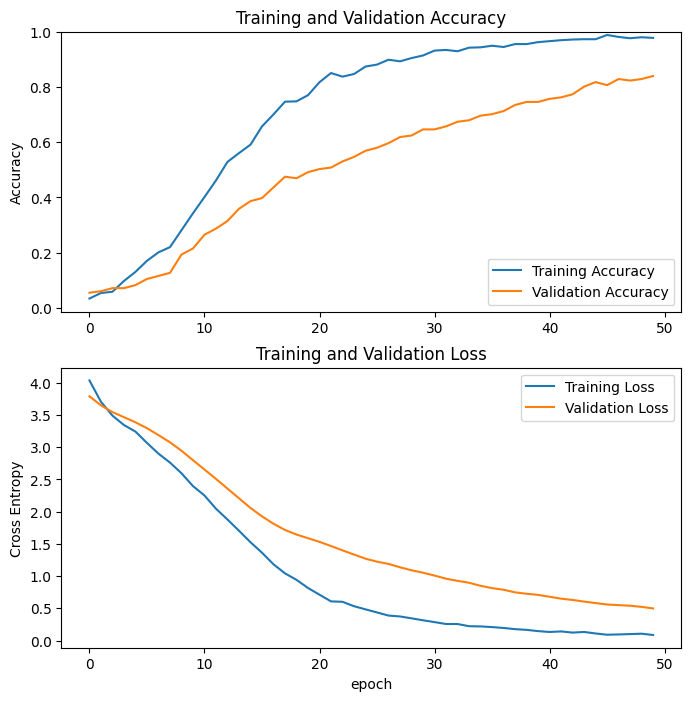

In [221]:
acc = history_mobnet.history['accuracy']
val_acc = history_mobnet.history['val_accuracy']

loss = history_mobnet.history['loss']
val_loss = history_mobnet.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [222]:
#train for another 50 epochs
epochs = 50

history_mobnet1 = mobnetv3_ft.fit(train_dataset,
                                epochs=epochs,
                                validation_data=val_dataset,
                                callbacks=[model_checkpoint_callback]
                                )

Epoch 1/50
14/14 [==============================] - 13s 903ms/step - loss: 0.0712 - accuracy: 0.9870 - val_loss: 0.4847 - val_accuracy: 0.8453
Epoch 2/50
14/14 [==============================] - 12s 880ms/step - loss: 0.0726 - accuracy: 0.9882 - val_loss: 0.4582 - val_accuracy: 0.8674
Epoch 3/50
14/14 [==============================] - 13s 896ms/step - loss: 0.0680 - accuracy: 0.9894 - val_loss: 0.4382 - val_accuracy: 0.8674
Epoch 4/50
14/14 [==============================] - 12s 876ms/step - loss: 0.0557 - accuracy: 0.9941 - val_loss: 0.4349 - val_accuracy: 0.8508
Epoch 5/50
14/14 [==============================] - 12s 884ms/step - loss: 0.0663 - accuracy: 0.9847 - val_loss: 0.4183 - val_accuracy: 0.8674
Epoch 6/50
14/14 [==============================] - 12s 884ms/step - loss: 0.0566 - accuracy: 0.9941 - val_loss: 0.3968 - val_accuracy: 0.8785
Epoch 7/50
14/14 [==============================] - 12s 875ms/step - loss: 0.0613 - accuracy: 0.9894 - val_loss: 0.3765 - val_accuracy: 0.8840

In [223]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history_mobnet.history, history_mobnet1.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

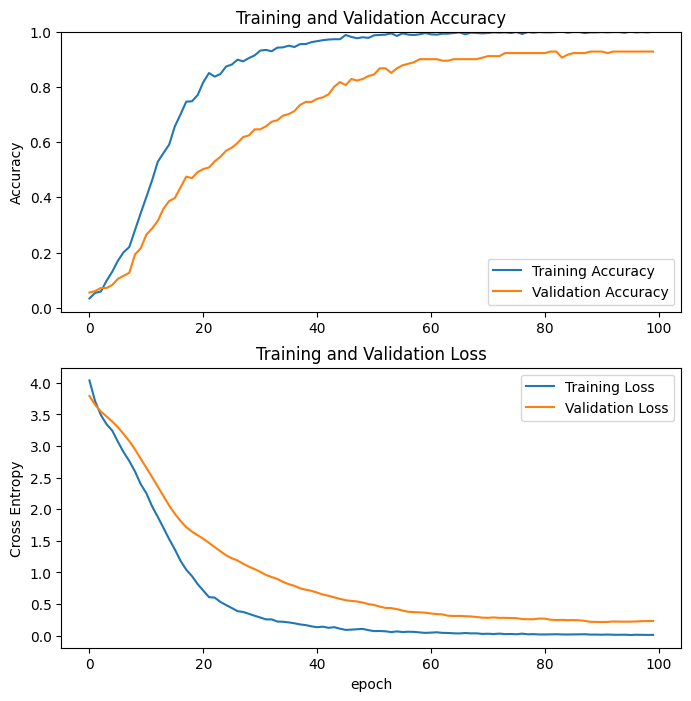

In [224]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [225]:
#decrease learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9)

mobnetv3_ft.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [226]:
#train for another 50 epochs
epochs = 50

history_mobnet2 = mobnetv3_ft.fit(train_dataset,
                                epochs=epochs,
                                validation_data=val_dataset,
                                callbacks=[model_checkpoint_callback]
                                )

Epoch 1/50


14/14 [==============================] - 20s 997ms/step - loss: 0.0118 - accuracy: 0.9988 - val_loss: 0.2311 - val_accuracy: 0.9282
Epoch 2/50
14/14 [==============================] - 13s 897ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.2309 - val_accuracy: 0.9282
Epoch 3/50
14/14 [==============================] - 13s 910ms/step - loss: 0.0135 - accuracy: 0.9988 - val_loss: 0.2309 - val_accuracy: 0.9282
Epoch 4/50
14/14 [==============================] - 13s 902ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.2308 - val_accuracy: 0.9282
Epoch 5/50
14/14 [==============================] - 13s 901ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.2305 - val_accuracy: 0.9282
Epoch 6/50
14/14 [==============================] - 13s 904ms/step - loss: 0.0107 - accuracy: 0.9988 - val_loss: 0.2304 - val_accuracy: 0.9282
Epoch 7/50
14/14 [==============================] - 13s 891ms/step - loss: 0.0112 - accuracy: 0.9988 - val_loss: 0.2302 - val_accuracy: 0.9282
Epoch 8/50

In [227]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history_mobnet.history, history_mobnet1.history, history_mobnet2.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

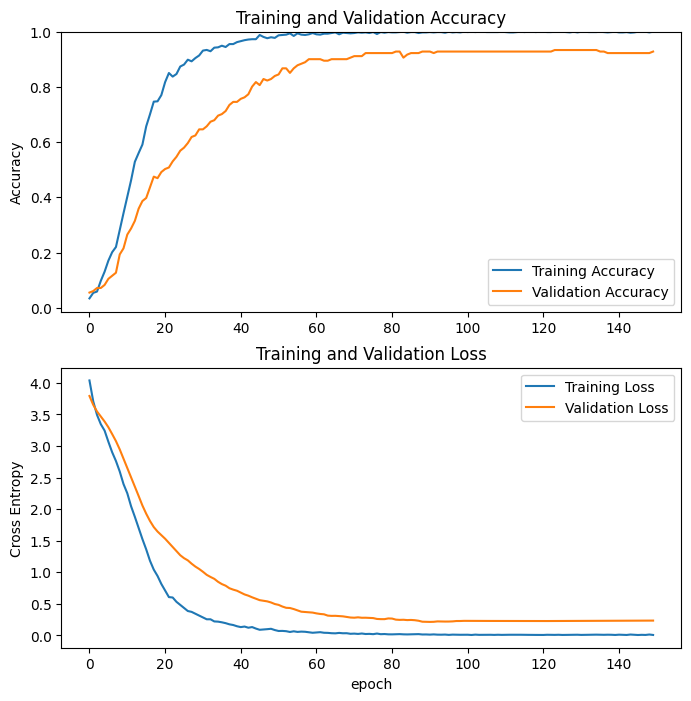

In [228]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [231]:
#train for another 50 epochs
epochs = 50

history_mobnet3 = mobnetv3_ft.fit(train_dataset,
                                epochs=epochs,
                                validation_data=val_dataset,
                                callbacks=[model_checkpoint_callback]
                                )

Epoch 1/50


14/14 [==============================] - 13s 957ms/step - loss: 0.0124 - accuracy: 0.9976 - val_loss: 0.2359 - val_accuracy: 0.9227
Epoch 2/50
14/14 [==============================] - 13s 895ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.2360 - val_accuracy: 0.9282
Epoch 3/50
14/14 [==============================] - 13s 899ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.2362 - val_accuracy: 0.9282
Epoch 4/50
14/14 [==============================] - 13s 904ms/step - loss: 0.0096 - accuracy: 0.9988 - val_loss: 0.2363 - val_accuracy: 0.9282
Epoch 5/50
14/14 [==============================] - 13s 912ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.2363 - val_accuracy: 0.9282
Epoch 6/50
14/14 [==============================] - 13s 913ms/step - loss: 0.0126 - accuracy: 0.9976 - val_loss: 0.2369 - val_accuracy: 0.9282
Epoch 7/50
14/14 [==============================] - 13s 919ms/step - loss: 0.0127 - accuracy: 0.9988 - val_loss: 0.2371 - val_accuracy: 0.9282
Epoch 8/50

In [232]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history_mobnet.history, history_mobnet1.history, history_mobnet2.history, history_mobnet3.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

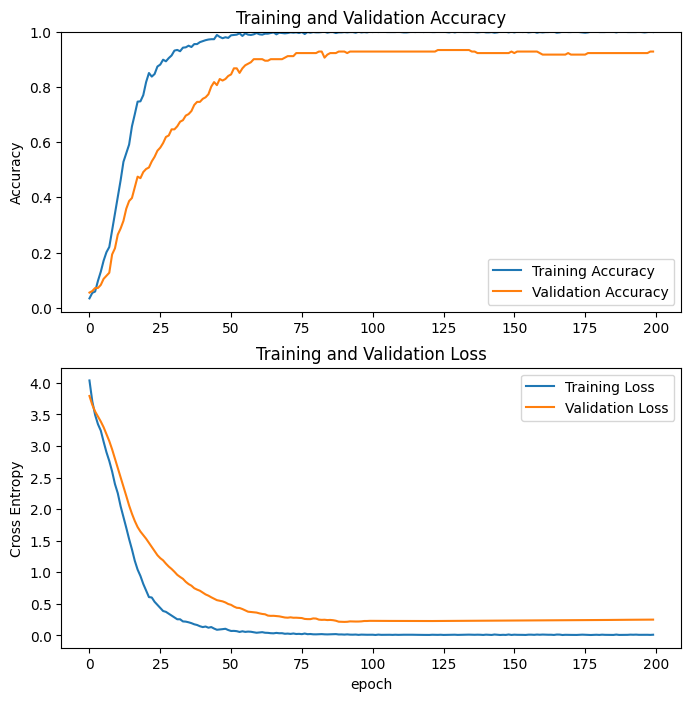

In [233]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [235]:
loss, accuracy = mobnetv3_ft.evaluate(test_dataset)
print('Test accuracy :', accuracy)

3/3 [==============================] - 0s 28ms/step - loss: 0.2075 - accuracy: 0.9282
Test accuracy : 0.9281768202781677


In [236]:
from sklearn.metrics import confusion_matrix

test_labels = []
pred_labels = []
for images, labels in test_dataset:
    test_labels += list(labels.numpy())
    pred_logits = mobnetv3_ft.predict(images)
    pred_labels += list(tf.math.argmax(pred_logits, axis=1))

cm = confusion_matrix(test_labels, pred_labels)

2/2 [==============================] - 1s 13ms/step


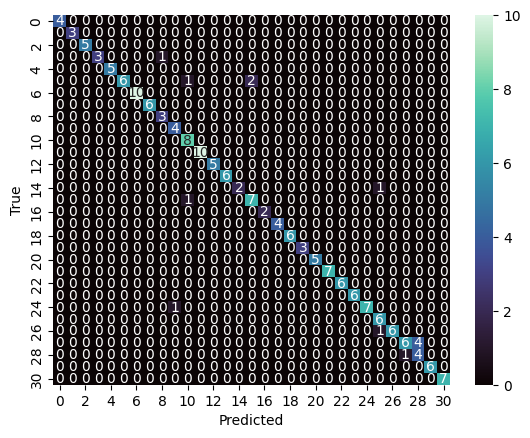

In [237]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

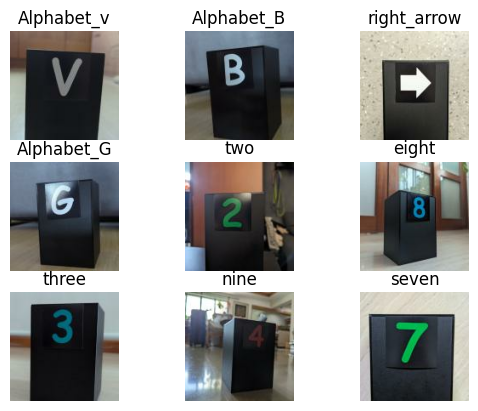

In [238]:
images, labels = next(iter(test_dataset))
preds = mobnetv3_ft(images)
preds = tf.math.argmax(preds, 1).numpy()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(preds[i])])
    plt.axis("off")

In [105]:
#mobnetv3_ft.save("./models/testing/mobnetv3_ft.keras")

##### effnet

In [239]:
effnetv2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape,
    include_preprocessing=True
)

In [240]:
effnetv2.trainable = True

In [241]:
effnetv2.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 128, 128, 3)  0           ['input_12[0][0]']               
                                                                                                  
 normalization (Normalization)  (None, 128, 128, 3)  0           ['rescaling_2[0][0]']            
                                                                                                  
 stem_conv (Conv2D)             (None, 64, 64, 32)   864         ['normalization[0

In [242]:
effnetv2_ft = keras.Sequential([
  keras.Input(shape=img_shape),
  data_augmentation,
  layers.Rescaling(255),
  effnetv2,
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.2),
  layers.Dense(len(classes))
])

In [244]:
effnetv2_ft.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 efficientnetv2-b0 (Function  (None, 4, 4, 1280)       5919312   
 al)                                                             
                                                                 
 global_average_pooling2d_9   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 1280)              0         
                                                                 
 dense_12 (Dense)            (None, 31)              

In [245]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

In [246]:
effnetv2_ft.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [247]:
checkpoint_filepath = 'models/testing/effnetv2_ft.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='max',
    save_best_only=True)


In [249]:
epochs = 50

history_effnet = effnetv2_ft.fit(train_dataset,
                    epochs=epochs,
                    validation_data=val_dataset,
                    callbacks=[model_checkpoint_callback]
                    )

Epoch 1/50
14/14 [==============================] - 25s 2s/step - loss: 3.4951 - accuracy: 0.0294 - val_loss: 3.4072 - val_accuracy: 0.0442
Epoch 2/50
14/14 [==============================] - 13s 942ms/step - loss: 3.2289 - accuracy: 0.1307 - val_loss: 3.2299 - val_accuracy: 0.1602
Epoch 3/50
14/14 [==============================] - 13s 910ms/step - loss: 2.9256 - accuracy: 0.2768 - val_loss: 2.8734 - val_accuracy: 0.2983
Epoch 4/50
14/14 [==============================] - 13s 926ms/step - loss: 2.5377 - accuracy: 0.4476 - val_loss: 2.4175 - val_accuracy: 0.4807
Epoch 5/50
14/14 [==============================] - 13s 918ms/step - loss: 2.0230 - accuracy: 0.6396 - val_loss: 1.9454 - val_accuracy: 0.6796
Epoch 6/50
14/14 [==============================] - 13s 920ms/step - loss: 1.5296 - accuracy: 0.7703 - val_loss: 1.5165 - val_accuracy: 0.7790
Epoch 7/50
14/14 [==============================] - 13s 934ms/step - loss: 1.1194 - accuracy: 0.8657 - val_loss: 1.1243 - val_accuracy: 0.8674
Ep

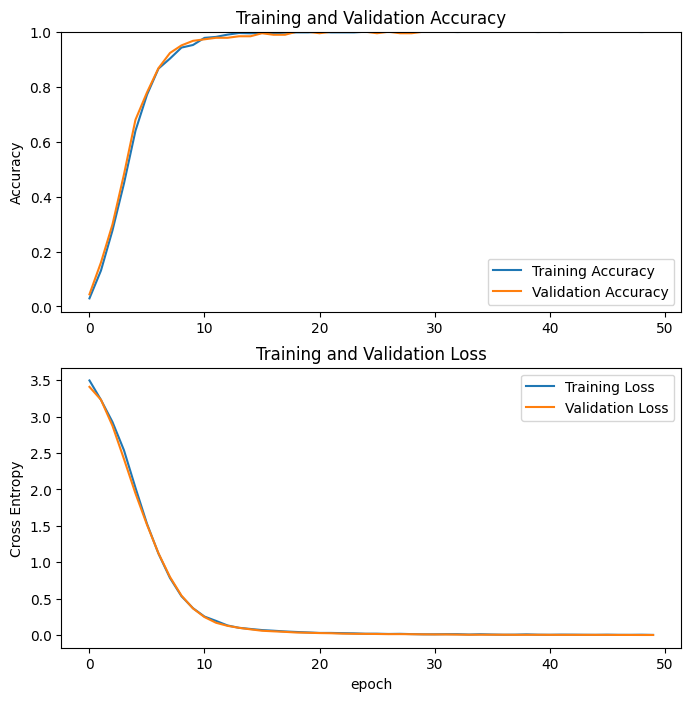

In [251]:
acc = history_effnet.history['accuracy']
val_acc = history_effnet.history['val_accuracy']

loss = history_effnet.history['loss']
val_loss = history_effnet.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [252]:
loss, accuracy = effnetv2_ft.evaluate(test_dataset)
print('Test accuracy :', accuracy)

3/3 [==============================] - 0s 44ms/step - loss: 0.0039 - accuracy: 1.0000
Test accuracy : 1.0


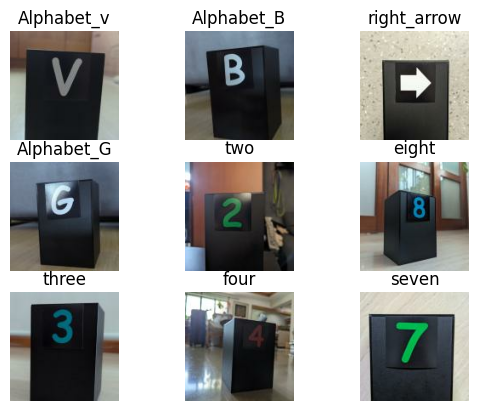

In [253]:
images, labels = next(iter(test_dataset))
preds_logits = effnetv2_ft(images)
preds = tf.math.argmax(preds_logits, 1).numpy()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(preds[i])])
    plt.axis("off")

In [87]:
#effnetv2_ft.save("./models/testing/effnetv2_ft.keras")